In [1]:
# import numpy, pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cartopy.util as util
import cartopy.crs as ccrs
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
import cmocean

## Download the data from ISIMIP Servers:

1. Use the isimip repository portal (https://data.isimip.org/search/) to select the models/variables to download
2. After selecting the dataset, click "Download file list" at the top of the webpage
3. Move the download list onto a super computer (winSCP - windows, or using the scp command - mac/linux)
4. Go to the directory that has the download file list run the command wget -i downloadFile.txt to befin the download on the data

We can use a sample file downloaded from the ISIMIP servers located at: 
    
/glade/scratch/vgarza/test/

In [18]:
#Open the file using xarray:
#note: download from isimip will start at 1850, but it was trimmed to start at 2000 due to github's size constraints
file = xr.open_dataset('/glade/scratch/vgarza/test/uploadFile/gfdl-esm4_r1i1p1f1_historical_tos_60arcmin_global_monthly_2000_2014.nc',decode_times=False)

In [19]:
#Look at the file
file

<xarray.Dataset>
Dimensions:    (time: 180, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) float64 4.788e+03 4.789e+03 ... 4.966e+03 4.968e+03
  * lon        (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat        (lat) float64 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                       Climate Data Interface version 2.0.2 (https://...
    source:                    GFDL-ESM4 (2018):\natmos: GFDL-AM4.1 (Cubed-sp...
    institution:               National Oceanic and Atmospheric Administratio...
    Conventions:               CF-1.7 CMIP-6.0 UGRID-1.0
    title:                     NOAA GFDL GFDL-ESM4 model output prepared for ...
    external_variables:        areacello
    ...                        ...
    variant_info:              N/A
    references:                see further_info_url attribute
    variant_label:             r1i1p1f1
    cdo_openmp_thread_number:  4
    history:                   Fri Aug 25 13:02:49 2023: cdo -selyear,2000/20...
    CDO:                       Climate Data Operators version 2.0.1 (https://...

In [20]:
#Look at the shape:
np.shape(file['tos'])

(180, 180, 360)

In [21]:
#Take the timeseries mean
time_series_mean = np.mean(file['tos'],axis=0)

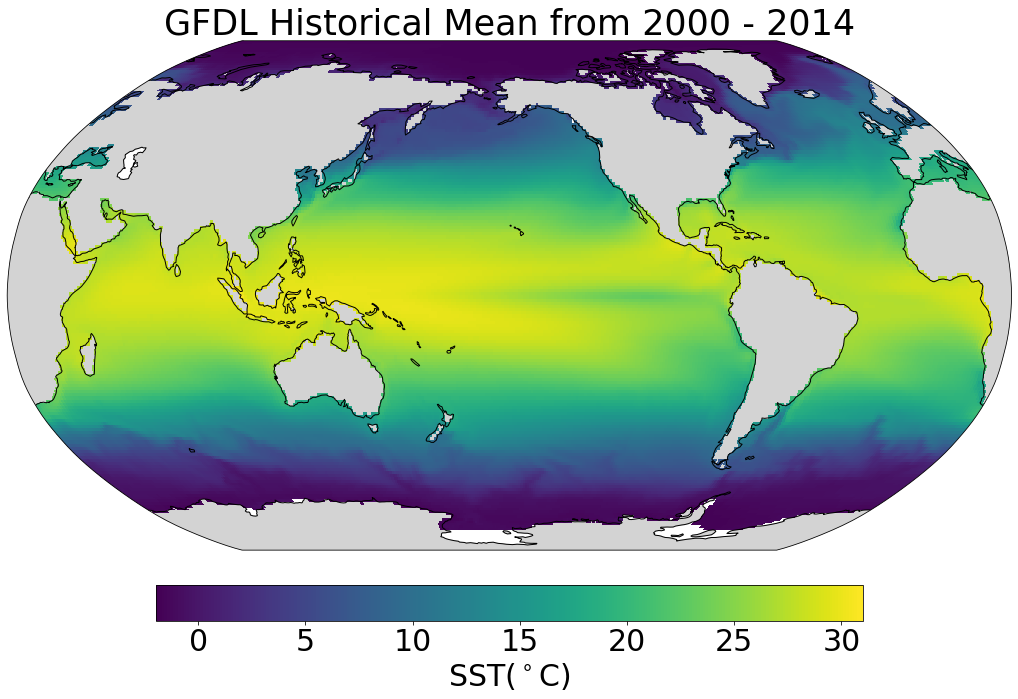

In [22]:
fig,ax= plt.subplots(figsize =(18,13),subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-160)),facecolor='white')
ax.add_feature(cfeature.LAND, color = 'lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

p = plt.pcolormesh(file['lon'],file['lat'],time_series_mean,# vmin = single_min, vmax = single_max, 
                transform=ccrs.PlateCarree(),zorder=-1) # Update to: cmocean.cm.balance) in dkrz


cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=30)
cbar.set_label("SST($^\circ$C)", size = 30)
plt.title('GFDL Historical Mean from 2000 - 2014',size = 35)
plt.show()
plt.close()